<a href="https://colab.research.google.com/github/olushogadaini/Customer-activity-prediction/blob/main/Copy_of_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**


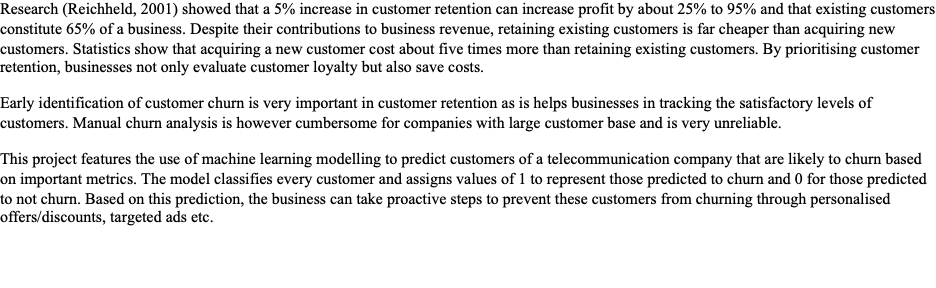

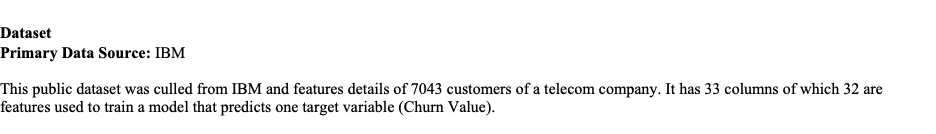

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn import set_config
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA

In [ ]:
#Reading the data into a pandas dataframe
churn = pd.read_csv('Telco_customer_churn.csv')

# Exploratory data analysis  

In [ ]:
#viewing the first five rows of the dataset
churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
#viewing the number of rows and columns in the dataset
churn.shape

(7043, 33)

In [ ]:
#checking the columns and their data types
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
#checking for null values
churn.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
#checking for empty spaces
churn.eq(' ').sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
Churn Reason          0
dtype: int64

In [ ]:
#summary of numerical variables in the dataset
churn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
#checking for duplicate entries
churn.duplicated().sum()

0

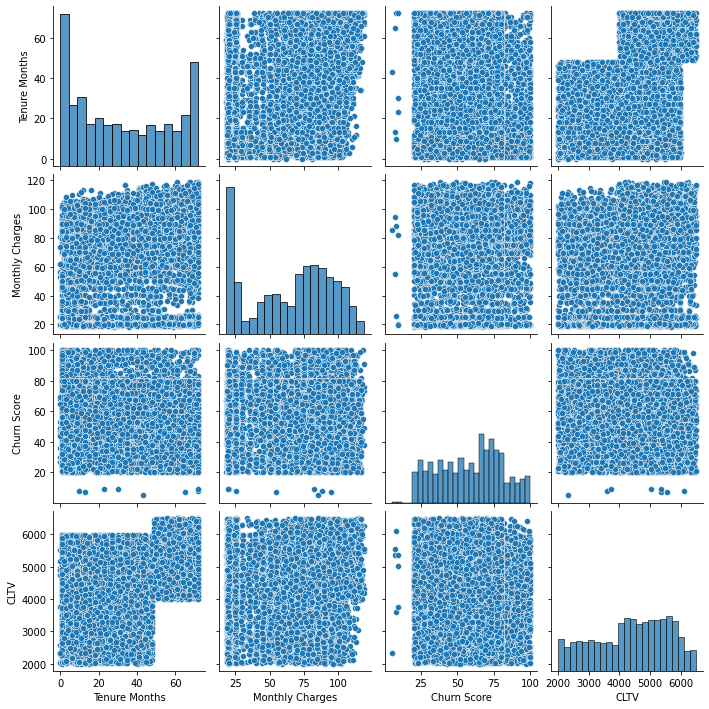

In [ ]:
#visualising the relationship between numerical variables
sns.pairplot(churn.iloc[:,[13,26,27,30,31]])

# Data Preprocessing

In [ ]:
#checking the frequency of each class of the target variable to detect a possible imbalance
churn['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

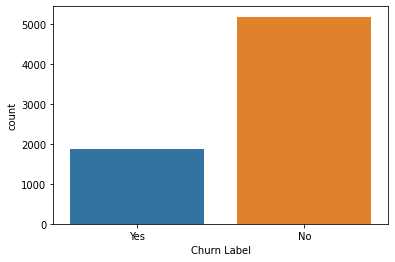

In [ ]:
 sns.countplot(churn['Churn Label'])

In [ ]:
#filtering the relevant columns
churn = churn.filter(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV', 'Churn Value'])
churn.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,86,3239,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,67,2701,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,86,5372,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,84,5003,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,89,5340,1


In [ ]:
churn.eq(' ').sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Score           0
CLTV                  0
Churn Value           0
dtype: int64

## Handling Missing Data

In [ ]:
#replacing empty spaces with zeros
churn['Total Charges'] = churn['Total Charges'].replace(' ', np.nan)

#converting to float data type
churn['Total Charges'] = churn['Total Charges'].astype(float)

churn = churn.dropna()

In [ ]:
churn.isna().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Score          0
CLTV                 0
Churn Value          0
dtype: int64

## Outlier Detection Using ZScore

In [ ]:
#checking for outliers in numerical variables using zscore

zscore_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
z = np.abs(stats.zscore(churn[zscore_cols]))
print(z)

      Tenure Months  Monthly Charges  Total Charges  Churn Score      CLTV
0          1.239504         0.363923       0.959649     1.267300  0.983181
1          1.239504         0.196178       0.940457     0.384802  1.438215
2          0.995040         1.158489       0.645369     1.267300  0.820883
3          0.180161         1.329677       0.336516     1.174405  0.508788
4          0.675462         1.293113       1.214589     1.406642  0.793818
...             ...              ...            ...          ...       ...
7038       1.612573         1.450886       0.381142     0.637038  0.765061
7039       0.343137         0.664868       0.129180     0.013223  1.912702
7040       1.612573         1.276493       2.241056     0.570591  0.979891
7041       0.872808         1.170004       0.854514     0.013223  1.360403
7042       1.368109         1.357932       2.012344     0.962169  0.588292

[7032 rows x 5 columns]


In [ ]:
#outlier detection using a threshold of z >3
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


## Encoding Categorical Features

In [ ]:
#converting categorical values to numerical values.
ohe = OneHotEncoder(sparse = False)

ohe.fit(churn[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']])
temp_churn = pd.DataFrame(data = ohe.transform(churn[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']]), columns= ohe.get_feature_names_out())
churn.drop(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'], axis=1, inplace= True)
churn = pd.concat([churn.reset_index(drop = True), temp_churn], axis = 1)
churn.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,86,3239,1,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,70.70,151.65,67,2701,1,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8,99.65,820.50,86,5372,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,28,104.80,3046.05,84,5003,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,49,103.70,5036.30,89,5340,1,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Scaling Numeric Features

In [ ]:
#scaling numerical columns
cols_to_scale = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
scaler = StandardScaler()
churn[cols_to_scale] = scaler.fit_transform(churn[cols_to_scale])

In [ ]:
#splitting the data into features(x) and target variable(y)
x = churn.drop(['Churn Value'], axis=1)
y = churn['Churn Value']

## Feature Selection - Dimensionality Reduction Using PCA

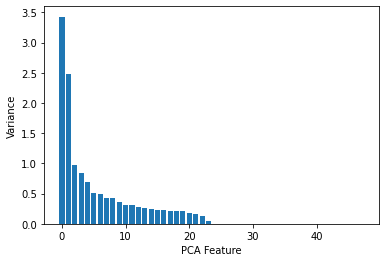

In [ ]:
#plotting variance for each feature
pca = PCA()
pca.fit_transform(x)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

In [ ]:
#retaining only features with variance > 0.5
pca = PCA(n_components = 5)
x = pca.fit_transform(x)

# Machine Learning Modelling

## Logistic Regression

In [ ]:
#splitting our data into train and test sets with both sets constituting 70% and 30% of the dataset respectively
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
#instantiating the model
model = LogisticRegression(max_iter=1200, class_weight = 'balanced')

#fitting the model to the train set
model.fit(xtrain, ytrain)

#predicting target variable results by passing the features test set through the trained model
ypred = model.predict(xtest)

#Evaluating model performance
accuracy = model.score(xtest, ytest)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)

print('The Accuracy is {}%'.format(round(accuracy*100)))
print('The Precision is {}%'.format(round(precision*100)))
print('The Recall is {}%'.format(round(recall*100)))
print('The F1-score is {}%'.format(round(f1*100)))
print(conf_matrix)
print(class_report)

The Accuracy is 91%
The Precision is 78%
The Recall is 93%
The F1-score is 85%
[[1371  151]
 [  43  545]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1522
           1       0.78      0.93      0.85       588

    accuracy                           0.91      2110
   macro avg       0.88      0.91      0.89      2110
weighted avg       0.92      0.91      0.91      2110



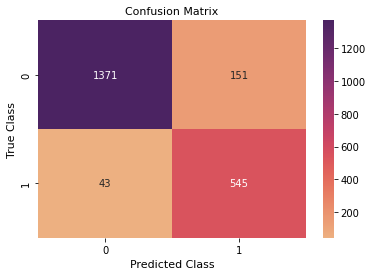

In [ ]:
ax = sns.heatmap(conf_matrix, cmap='flare', annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize=11)
plt.ylabel('True Class', fontsize = 11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

## Neural Network

In [ ]:
#instantiating a sequential model

model = Sequential()

#adding a dense layer
model.add(Dense(1, input_shape=(5,), activation='sigmoid'))

#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

#displaying model summary
model.summary( )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#calculating the weight for each class
nn_weights = class_weight.compute_class_weight('balanced', classes = np.unique(ytrain), y=ytrain)
nn_weights

array([0.67591321, 1.92115535])

In [ ]:
#converting the calculated weights from arrays to dictionaries

nn_weights = dict(zip(np.unique(ytrain), nn_weights))
nn_weights

{0: 0.6759132106564131, 1: 1.9211553473848555}

In [ ]:
#training the model
history = model.fit(xtrain, ytrain, epochs=30, batch_size = 7, class_weight= nn_weights, verbose =2, validation_split=0.3)

#evaluating model accuracy
accuracy = model.evaluate(xtest, ytest)[1]

print('The accuracy is: {}'.format(accuracy))


Epoch 1/30
493/493 - 2s - loss: 0.7449 - accuracy: 0.5968 - val_loss: 0.4798 - val_accuracy: 0.7705 - 2s/epoch - 4ms/step
Epoch 2/30
493/493 - 1s - loss: 0.3493 - accuracy: 0.8194 - val_loss: 0.3670 - val_accuracy: 0.8368 - 1s/epoch - 2ms/step
Epoch 3/30
493/493 - 1s - loss: 0.2936 - accuracy: 0.8537 - val_loss: 0.3215 - val_accuracy: 0.8504 - 919ms/epoch - 2ms/step
Epoch 4/30
493/493 - 1s - loss: 0.2690 - accuracy: 0.8700 - val_loss: 0.2953 - val_accuracy: 0.8680 - 895ms/epoch - 2ms/step
Epoch 5/30
493/493 - 1s - loss: 0.2547 - accuracy: 0.8798 - val_loss: 0.2779 - val_accuracy: 0.8761 - 978ms/epoch - 2ms/step
Epoch 6/30
493/493 - 1s - loss: 0.2453 - accuracy: 0.8833 - val_loss: 0.2675 - val_accuracy: 0.8856 - 946ms/epoch - 2ms/step
Epoch 7/30
493/493 - 1s - loss: 0.2385 - accuracy: 0.8859 - val_loss: 0.2606 - val_accuracy: 0.8856 - 991ms/epoch - 2ms/step
Epoch 8/30
493/493 - 1s - loss: 0.2335 - accuracy: 0.8871 - val_loss: 0.2539 - val_accuracy: 0.8890 - 973ms/epoch - 2ms/step
Epoch 

In [ ]:
ypred = (model.predict(xtest) > 0.5).astype("int32")
ypred = ypred[:,0]

66/66 [==============================] - 0s 6ms/step


In [ ]:
#Evaluating model performance
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)


print('The Precision is {}%'.format(round(precision*100)))
print('The Recall is {}%'.format(round(recall*100)))
print('The F1-score is {}%'.format(round(f1*100)))
print(conf_matrix)
print(class_report)

The Precision is 78%
The Recall is 93%
The F1-score is 85%
[[1364  158]
 [  40  548]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1522
           1       0.78      0.93      0.85       588

    accuracy                           0.91      2110
   macro avg       0.87      0.91      0.89      2110
weighted avg       0.92      0.91      0.91      2110



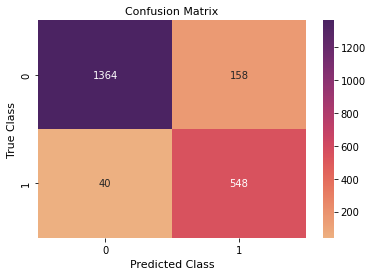

In [ ]:
ax = sns.heatmap(conf_matrix, cmap='flare', annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize=11)
plt.ylabel('True Class', fontsize = 11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

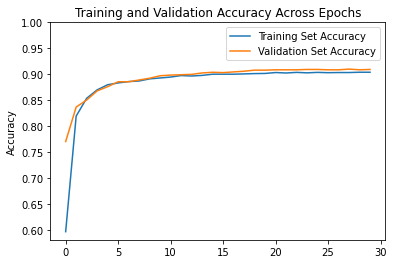

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

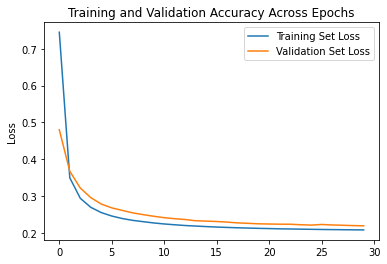

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

#Evaluating Performance Of Multiple Models

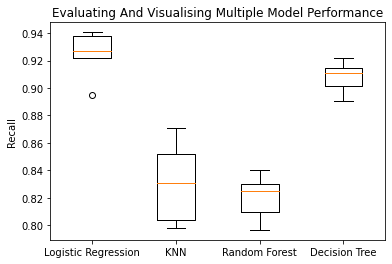

In [ ]:
#visualizing all models and comparing their respective accuracy scores

#splitting our data into train and test sets with both sets constituting 70% and 30% of the dataset respectively
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#creating a dictionary with the models as keys and their names as values.
models = {'Logistic Regression' :LogisticRegression(max_iter=2000, class_weight='balanced'), 'KNN' :KNeighborsClassifier(n_neighbors=17), 'Random Forest' :RandomForestClassifier(class_weight='balanced'), 'Decision Tree' :DecisionTreeClassifier(max_depth=6, class_weight='balanced')}


#creating an empty list to pass the result of each model
results = []

for model in models.values():
    kf = KFold(n_splits =5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='recall')
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.ylabel('Recall')
plt.title('Evaluating And Visualising Multiple Model Performance')
plt.show()

**CONCLUSION**

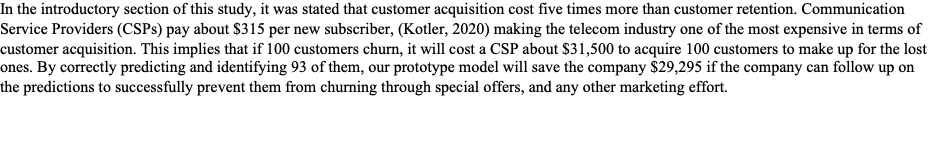